In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from pandas import ExcelWriter
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
from sklearn.metrics import roc_auc_score, roc_curve, log_loss, confusion_matrix, precision_score, recall_score, classification_report, accuracy_score
#classificators
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import collections
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
scaler = StandardScaler()
label = LabelEncoder()

In [16]:
df=pd.read_csv('data.csv',index_col=False)

Генерим немного фич

In [18]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22


In [19]:
df.columns

Index([u'symboling', u'normalized-losses', u'make', u'fuel-type',
       u'aspiration', u'num-of-doors', u'body-style', u'drive-wheels',
       u'engine-location', u'wheel-base', u'length', u'width', u'height',
       u'curb-weight', u'engine-type', u'num-of-cylinders', u'engine-size',
       u'fuel-system', u'bore', u'stroke', u'compression-ratio', u'horsepower',
       u'peak-rpm', u'city-mpg', u'price'],
      dtype='object')

In [20]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
price                  int64
dtype: object

In [ ]:
df.isnull().values.any()

In [ ]:
df=df2.copy()

In [ ]:
label.fit_transform(df['POLICY_CLM_N'])

In [ ]:
cnt=collections.Counter(df['POLICY_CLM_GLT_N'])
for i in range(len(cnt)):
    df['POLICY_CLM_GLT_N'][df['POLICY_CLM_GLT_N']==list(cnt.keys())[i]]=list(cnt.values())[i]

In [ ]:
df['POLICY_CLM_N']

Предобработка: категориальное и частотное кодирование, скалер, новые фичи, замена пропусков

In [163]:
def preproc(data):
    data['POLICY_YEARS_RENEWED_N']=data['POLICY_YEARS_RENEWED_N'].replace('N', 0)
    data=data.drop('POLICY_ID', axis=1)
    data.Polis=data.POLICY_END_MONTH-data.POLICY_BEGIN_MONTH
    cat_val=['VEHICLE_MAKE',   'INSURER_GENDER']
    for i in cat_val:
        data[i]=label.fit_transform(data[i])
    freq_val=['VEHICLE_MODEL', 'POLICY_CLM_N',  'POLICY_INTERMEDIARY', 'CLIENT_REGISTRATION_REGION','POLICY_BRANCH','POLICY_PRV_CLM_GLT_N','POLICY_PRV_CLM_N','POLICY_CLM_GLT_N']
    for j in freq_val:
        cnt=collections.Counter(data[j])
        for i in range(len(cnt)):
            data[j][data[j]==list(cnt.keys())[i]]=list(cnt.values())[i]
    X=scaler.fit_transform(data)
    X=pd.DataFrame(X)
    X.columns=data.columns
    return X

In [ ]:
Y=df.POLICY_IS_RENEWED
df=df.drop('POLICY_IS_RENEWED',axis=1)
X=preproc(df)

In [ ]:
X=X.drop('POLICY_ID', axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=0)

In [ ]:
clf = RandomForestClassifier(random_state=0,class_weight="balanced")
tuned_parameters = [{'min_samples_split':np.arange(1, 4, 1)},
                     {'n_estimators':np.arange(5, 50, 5)},
                      {'max_depth':np.arange(1, 6, 1)}]
gs = GridSearchCV(clf, tuned_parameters, cv=7, verbose=True)

In [ ]:
gs.fit(X_train, y_train)

In [ ]:
clf = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)
tuned_parameters = [{'learning_rate':np.arange(0.2, 1, 0.1)},
                     {'n_estimators':np.arange(60, 200, 20)},
                      {'max_depth':np.arange(2, 6, 1)}]
gs = GridSearchCV(clf, tuned_parameters, cv=5, verbose=True)
gs.fit(X_train, y_train)      
preds_gb=gs.predict_proba(X_test)

In [ ]:
print ('ROC_AUC: ', roc_auc_score(gs.predict(X_train), y_train))   
print ('ROC_AUC: ', roc_auc_score(gs.predict(X_test), y_test))   

In [ ]:
preds_train=pd.Series(gs.predict(X_train))
preds_train.value_counts()[:15]
preds_gb=gs.predict_proba(X_test)

In [ ]:
imp = pd.DataFrame(list(zip(df.columns, clf.feature_importances_)))
imp=imp[:30]
imp = imp.reindex(imp[1].abs().sort_values().index).set_index(0)
#график_фич
ax = imp.plot.barh(width = .6, legend = "", figsize = (12, 9))
ax.set_title("Gradient Boosting coefs", y = 1.03, fontsize = 16.)
_ = ax.set(frame_on = False, xlabel = "", xticklabels = "", ylabel = "")
for i, label in enumerate(list(imp.index)):
    score = imp.loc[label][1]
    ax.annotate('%.2f' % score, (score + (-.12 if score < 0 else .02), i - .2), fontsize = 10.5)

Пробуем ХГБ

In [146]:
import xgboost as xgb

# Set our parameters for xgboost
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'auc'
params['eta'] = 0.02
params['max_depth'] = 6

d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 1000, watchlist, early_stopping_rounds=50, verbose_eval=10)

[0]	train-auc:0.71006	valid-auc:0.704069
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 50 rounds.
[10]	train-auc:0.717536	valid-auc:0.711743
[20]	train-auc:0.720197	valid-auc:0.71354
[30]	train-auc:0.724739	valid-auc:0.717264
[40]	train-auc:0.728711	valid-auc:0.719639
[50]	train-auc:0.731554	valid-auc:0.72155
[60]	train-auc:0.734805	valid-auc:0.723619
[70]	train-auc:0.738738	valid-auc:0.726108
[80]	train-auc:0.742167	valid-auc:0.728069
[90]	train-auc:0.744873	valid-auc:0.729756
[100]	train-auc:0.747533	valid-auc:0.731072
[110]	train-auc:0.749909	valid-auc:0.732165
[120]	train-auc:0.752308	valid-auc:0.733327
[130]	train-auc:0.75452	valid-auc:0.73432
[140]	train-auc:0.756548	valid-auc:0.734913
[150]	train-auc:0.758471	valid-auc:0.735421
[160]	train-auc:0.760368	valid-auc:0.73601
[170]	train-auc:0.76235	valid-auc:0.736735
[180]	train-auc:0.764157	valid-auc:0.73756
[190]	train-auc:0.765506	valid-auc:0.738

In [160]:
preds=bst.predict(d_train)
preds

array([ 0.27196217,  0.16868275,  0.88601112, ...,  0.47607931,
        0.67035526,  0.78050154], dtype=float32)

In [ ]:
print ('ROC_AUC: ', roc_auc_score(bst.predict(X_train), y_train))  

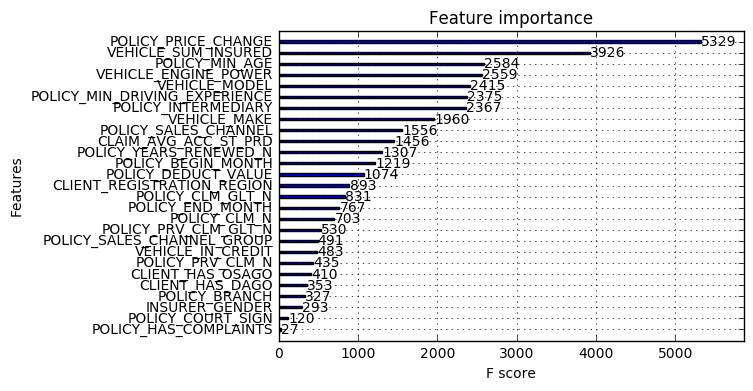

In [157]:
xgb.plot_importance(bst)

In [ ]:
#ROC_Curve 
plt.figure(figsize = (8, 8))
plt.plot(*roc_curve(y_test, preds_gb[:, 1])[:2])
plt.legend(["GB Classifier"], loc = "upper left")
plt.plot((0., 1.), (0., 1.), "--k", alpha = .7)
plt.xlabel("False Positive Rate"), plt.ylabel("True Positive Rate")
plt.title("ROC Curves", fontsize = 16.)

# TEST

In [181]:
def preproc(data):
    data['POLICY_YEARS_RENEWED_N']=data['POLICY_YEARS_RENEWED_N'].replace('N', 0)
    data=data.drop('POLICY_ID', axis=1)
    data.Polis=data.POLICY_END_MONTH-data.POLICY_BEGIN_MONTH
    cat_val=['VEHICLE_MAKE',   'INSURER_GENDER']
    for i in cat_val:
        data[i]=label.fit_transform(data[i])
    freq_val=['VEHICLE_MODEL', 'POLICY_CLM_N',  'POLICY_INTERMEDIARY', 'CLIENT_REGISTRATION_REGION','POLICY_BRANCH','POLICY_PRV_CLM_GLT_N','POLICY_PRV_CLM_N','POLICY_CLM_GLT_N']
    for j in freq_val:
        cnt=collections.Counter(data[j])
        for i in range(len(cnt)):
            data[j][data[j]==list(cnt.keys())[i]]=list(cnt.values())[i]
    X=scaler.fit_transform(data)
    X=pd.DataFrame(X)
    X.columns=data.columns
    return X

In [182]:
test2=preproc(test)

In [183]:
test2=test2.drop('POLICY_IS_RENEWED',axis=1)

In [187]:
ans=bst.predict(xgb.DMatrix(test2))
ans

array([ 0.60760218,  0.40577602,  0.39062798, ...,  0.60896689,
        0.49212492,  0.43574387], dtype=float32)

In [190]:
ans=pd.concat([test["POLICY_IS_RENEWED"],pd.DataFrame(ans)], axis=1)
ans.to_csv("ren1.csv")